# 5. Real-world datasets

This module will go through examples using real-world datasets that contain noisy human annotations. We will primarily focus on using the CIFAR-N dataset.

### Synthetic label noise v.s. Real-world label noise

**Synthetic label noise**

* Pro: Widely adopted settings which greatly enable statistical analyses.

* Con: Fail to model real-world noise patterns.

**Real-world noisy datasets**

* Pro: More realistic \& natural.

* Con: Often lack of ground-truth labels for verification.

* Con: Large scale data may lead to unfair comparisons.

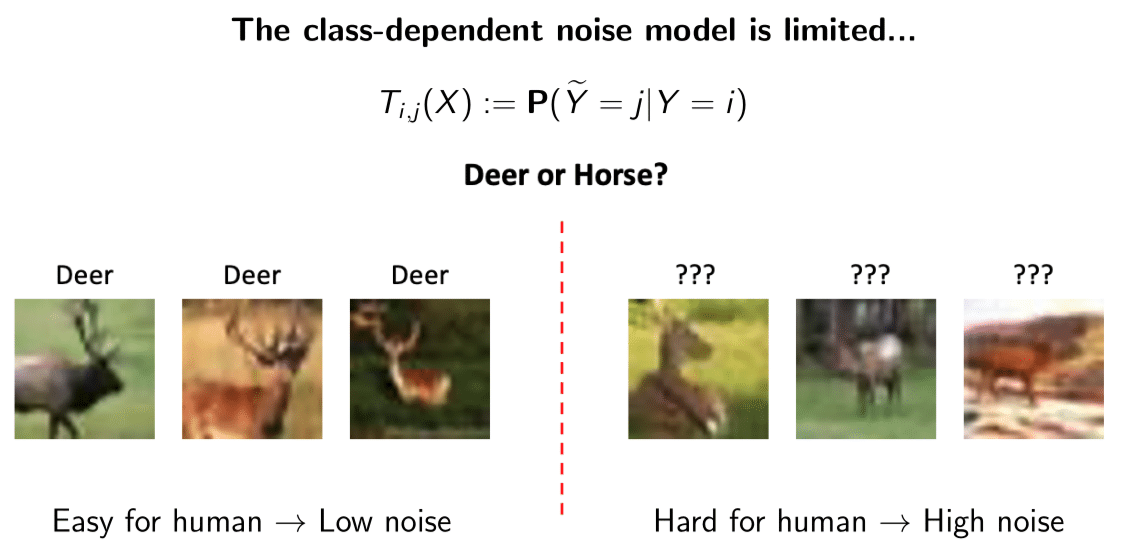

In [10]:
from IPython.display import Image
display(Image(filename='tutorial_imgs/limit.png', width = 750, height = 400))

### CIFAR-N: CIFAR datasets with Noisy human annotations

**Dataset construction** (CIFAR-10N)

We randomly split the training dataset of CIFAR-10 without replacement into ten batches. In the Mturk interface each batch contains 500 HITs with 10 images per HIT. The training images and test dataset remain unchanged. Each HIT is then randomly assigned to three independent workers Workers gain base reward $0.03 after submitting the answers of each HIT. We reward workers with huge bonus salary if the worker contributes more HITs than the averaged number of submissions. We did not make use of any ground-truth clean labels to approve or reject submissions We only block and reject workers who submit answers with fixed/regular distribution patterns.

A illustration mturk interface figure is given below.

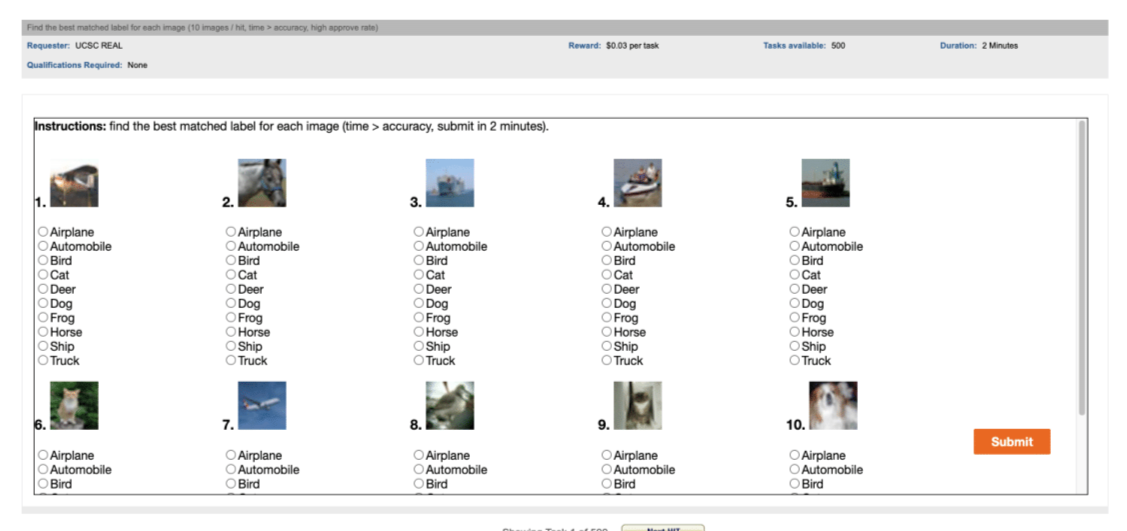

In [11]:
from IPython.display import Image
display(Image(filename='tutorial_imgs/turk.png', width = 750, height = 400))

**Dataset statistics of CIFAR-10N**

For **CIFAR-10N** dataset, each training image contains one clean label and three human annotated labels. We provide five noisy-label sets as follows:

* **Aggregate:** Aggregation of three noisy labels by majority voting. If the submitted three labels are different for an image, the aggregated label will be randomly selected among the three labels.

* **Random $i~(i\in\{1,2,3\})$:** The $i$-th submitted label for each image. Note our collection procedure ensures that one image cannot be repeatedly labeled by the same worker.

* **Worst:** Dataset with the highest noise rate. For each image, if there exist any wrongly annotated labels in three noisy labels, the worst label is randomly selected from wrong labels.

In CIFAR-10N, **60.27\%** of the training images have received unanimous label from three independent labelers. The noise rates of prepared five noisy label sets are **9.03\% (Aggregate), 17.23\% (Random 1), 18.12\% (Random 2), 17.64\% (Random 3)** and **40.21\% (Worst)**. 

**CIFAR-100N**

We split the training dataset of CIFAR-100 without replacement into ten batches with five images per HIT. Only one worker is assigned to each HIT. We group the 100 classes into 20 disjoint super-classes. Workers are instructed to firstly select the super-class for each image. And will then be re-directed to the best matched fine label. Since some super-classes are hard to recognize without prior knowledge in biology, we provide workers with easy access to re-select the super-class, and every fine class has an example image for references. The rejecting rule and the bonus policy are the same as those in CIFAR-10N. 

For CIFAR-100N dataset, each image contains a coarse label and a fine label given by a human annotator.  Most batches have approximately **40\%** noisy fine labels and **25 \%** noisy coarse labels. The overall noise level of coarse and fine labels are **25.60\%** and **40.20\%**, respectively. 


### Preliminary observations from CIFAR-N

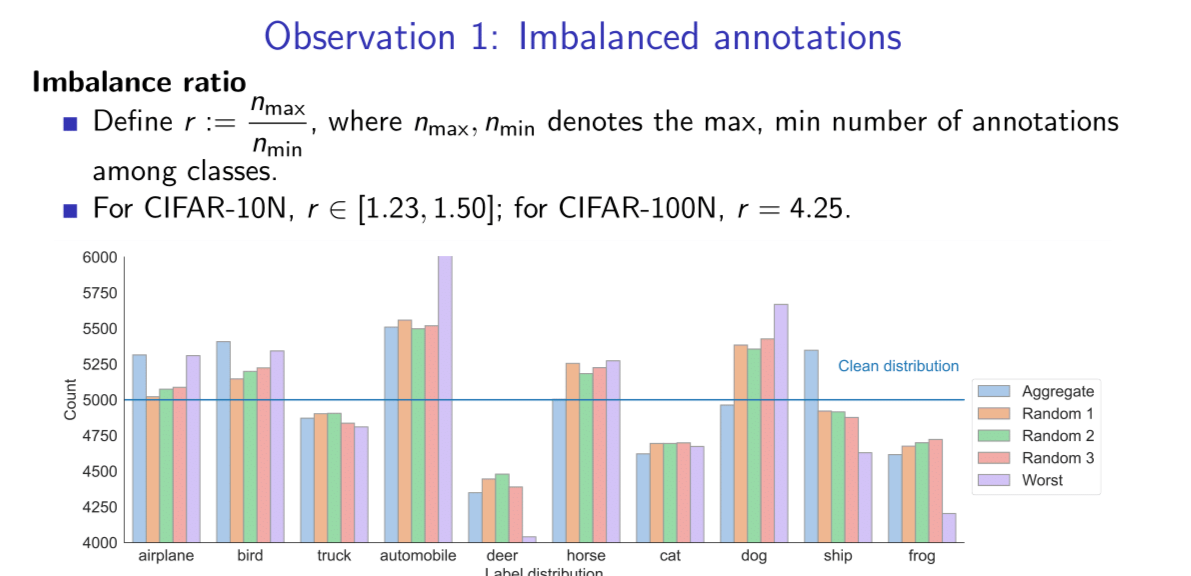

In [12]:
display(Image(filename='tutorial_imgs/obs1.png', width = 750, height = 400))

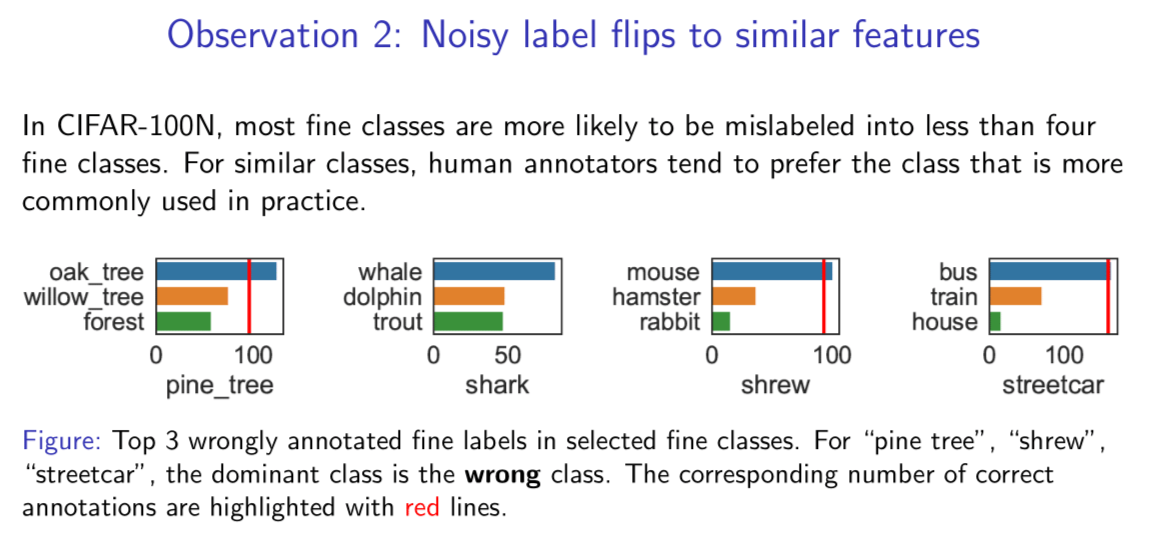

In [13]:
display(Image(filename='tutorial_imgs/obs2.png', width = 750, height = 400))

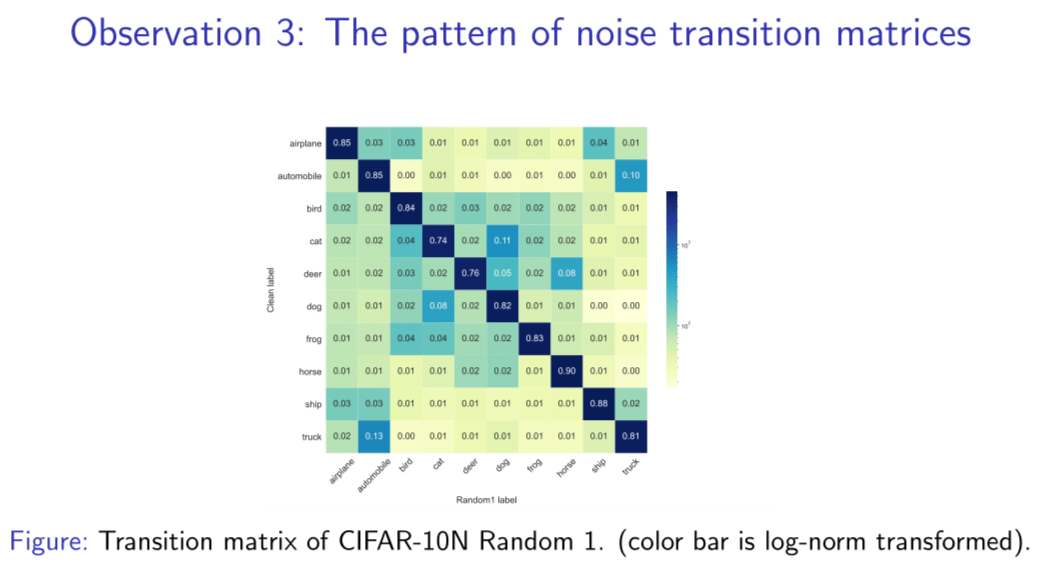

In [14]:
display(Image(filename='tutorial_imgs/obs3.png', width = 750, height = 400))

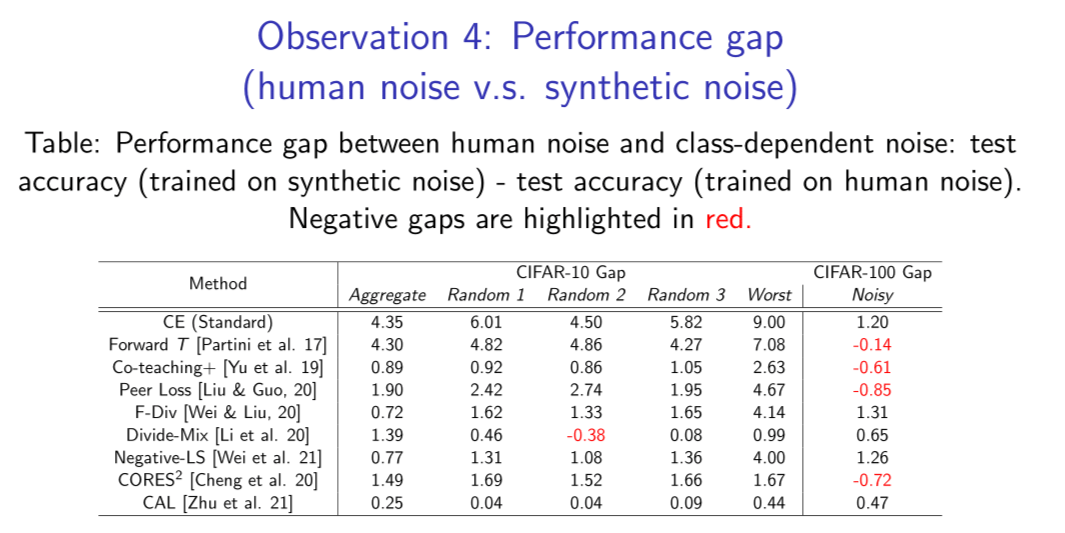

In [15]:
display(Image(filename='tutorial_imgs/obs4.png', width = 750, height = 400))

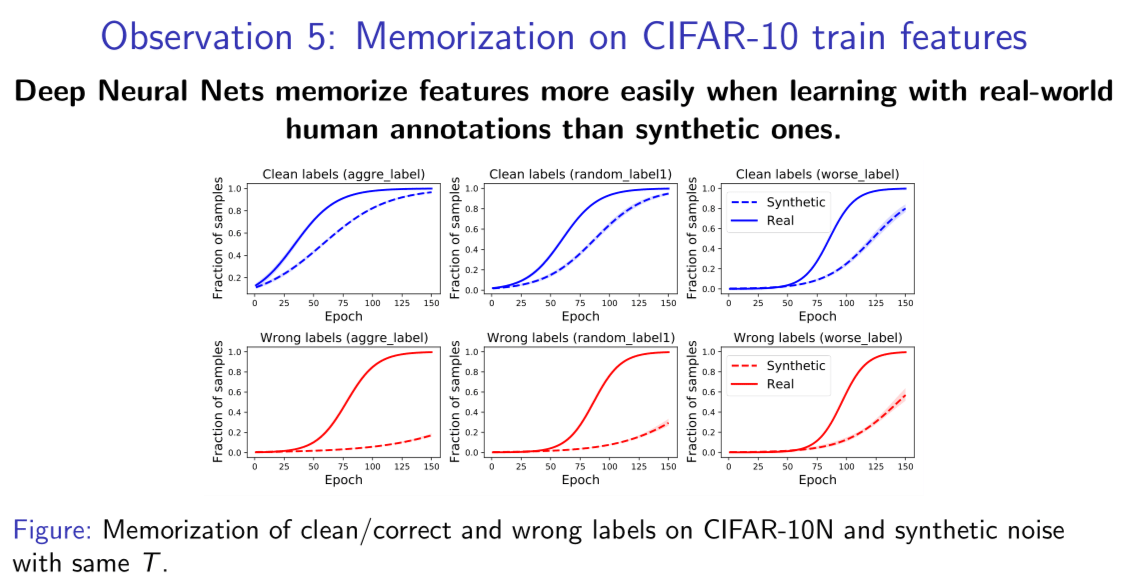

In [16]:
display(Image(filename='tutorial_imgs/obs5.png', width = 750, height = 400))

### Read the CIFAR-N dataset (PyTorch)

In [17]:
import torch
noise_file = torch.load('./data/CIFAR-10_human.pt')
clean_label = noise_file['clean_label']
worst_label = noise_file['worse_label']
aggre_label = noise_file['aggre_label']
random_label1 = noise_file['random_label1']
random_label2 = noise_file['random_label2']
random_label3 = noise_file['random_label3']

### Train the CE loss on CIFAR-N dataset (PyTorch)

In [18]:
%run main_cifarn.py --noise_type 'rand1' --n_epoch 1

Files already downloaded and verified
Loaded random_label1 from ./data/CIFAR-10_human.pt.
The overall noise rate is 0.17234000000000005
noisy labels loaded from ./data/CIFAR-10_human.pt
Noise transition matrix is 
[[0.8484 0.0274 0.0294 0.0086 0.0068 0.0094 0.0082 0.0064 0.0408 0.0146]
 [0.0142 0.8466 0.0046 0.0088 0.0058 0.0046 0.005  0.0048 0.0086 0.097 ]
 [0.0214 0.0152 0.84   0.0214 0.0272 0.0202 0.023  0.0152 0.01   0.0064]
 [0.0158 0.0152 0.044  0.743  0.0188 0.1084 0.024  0.0158 0.0072 0.0078]
 [0.0148 0.0152 0.0298 0.0192 0.76   0.0504 0.0186 0.077  0.0088 0.0062]
 [0.014  0.0108 0.0236 0.0818 0.0166 0.8234 0.01   0.0126 0.0038 0.0034]
 [0.015  0.014  0.0386 0.0358 0.0196 0.0226 0.827  0.012  0.01   0.0054]
 [0.0148 0.0118 0.0074 0.009  0.0206 0.0236 0.0072 0.895  0.0062 0.0044]
 [0.0298 0.0296 0.0072 0.0062 0.007  0.006  0.0066 0.0068 0.8794 0.0214]
 [0.016  0.1258 0.0046 0.005  0.0066 0.008  0.0054 0.0054 0.0094 0.8138]]
flip with random seed 0
New synthetic noise transition 

AssertionError: Torch not compiled with CUDA enabled